<a href="https://colab.research.google.com/github/minjaekim070/Bootcamp_Project/blob/main/fer_library.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#라이브러리

In [ ]:
!pip install fer

In [ ]:
!pip install pydub

In [ ]:
from fer import Video
from fer import FER
import cv2
import os
import sys
import pandas as pd
from pydub.playback import play
from pydub import AudioSegment
import matplotlib.pyplot as plt

테스트

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
img1 = cv2.imread("/content/테스트1.jpg")
img2 = cv2.imread("/content/테스트2.jpg")
img3 = cv2.imread("/content/테스트3.jpg")

In [ ]:
detector = FER()

print('img1에 대한 분석:',detector.detect_emotions(img1))
print('\nimg2에 대한 분석:',detector.detect_emotions(img2))
print('\nimg1에 대한 분석:',detector.detect_emotions(img3))

img1에 대한 분석: [{'box': array([203, 447, 314, 314], dtype=int32), 'emotions': {'angry': 0.07, 'disgust': 0.0, 'fear': 0.11, 'happy': 0.01, 'sad': 0.57, 'surprise': 0.01, 'neutral': 0.24}}, {'box': array([272, 359, 264, 264], dtype=int32), 'emotions': {'angry': 0.14, 'disgust': 0.0, 'fear': 0.04, 'happy': 0.08, 'sad': 0.49, 'surprise': 0.01, 'neutral': 0.24}}]

img2에 대한 분석: [{'box': array([302, 435, 363, 363], dtype=int32), 'emotions': {'angry': 0.13, 'disgust': 0.0, 'fear': 0.26, 'happy': 0.01, 'sad': 0.42, 'surprise': 0.0, 'neutral': 0.18}}]

img1에 대한 분석: [{'box': array([306, 437, 358, 358], dtype=int32), 'emotions': {'angry': 0.14, 'disgust': 0.0, 'fear': 0.25, 'happy': 0.01, 'sad': 0.35, 'surprise': 0.0, 'neutral': 0.24}}]


In [ ]:
detector = FER()

In [ ]:
videofile_location = '/content/drive/MyDrive/sample_video.mp4'
#얼굴 인식
face_detector = FER(mtcnn = True)
#비디오 처리 입력값 설정
input_video = Video(videofile_location)

In [ ]:
processing_data = input_video.analyze(face_detector, display = False)

INFO:fer:29.43 fps, 518 frames, 17.60 seconds
INFO:fer:Making directories at output
100%|█████████▉| 517/518 [04:38<00:00,  1.86frames/s]
INFO:fer:Completed analysis: saved to output/sample_video_output.mp4
INFO:fer:Starting to Zip
INFO:fer:Compressing: 9%
INFO:fer:Compressing: 19%
INFO:fer:Compressing: 29%
INFO:fer:Compressing: 38%
INFO:fer:Compressing: 48%
INFO:fer:Compressing: 58%
INFO:fer:Compressing: 67%
INFO:fer:Compressing: 77%
INFO:fer:Compressing: 87%
INFO:fer:Compressing: 96%
INFO:fer:Zip has finished


In [ ]:
# to_pandas 메서드로 DataFrame으로 변환
vid_df = input_video.to_pandas(processing_data)

# get_first_face 메서드를 통해 각 프레임의 첫 번째 얼굴 데이터를 가져와 DataFrame에 추가
vid_df = input_video.get_first_face(vid_df)

# get_emotions 메서드를 통해 얼굴 감정 데이터를 가져와 DataFrame에 추가
vid_df = input_video.get_emotions(vid_df)

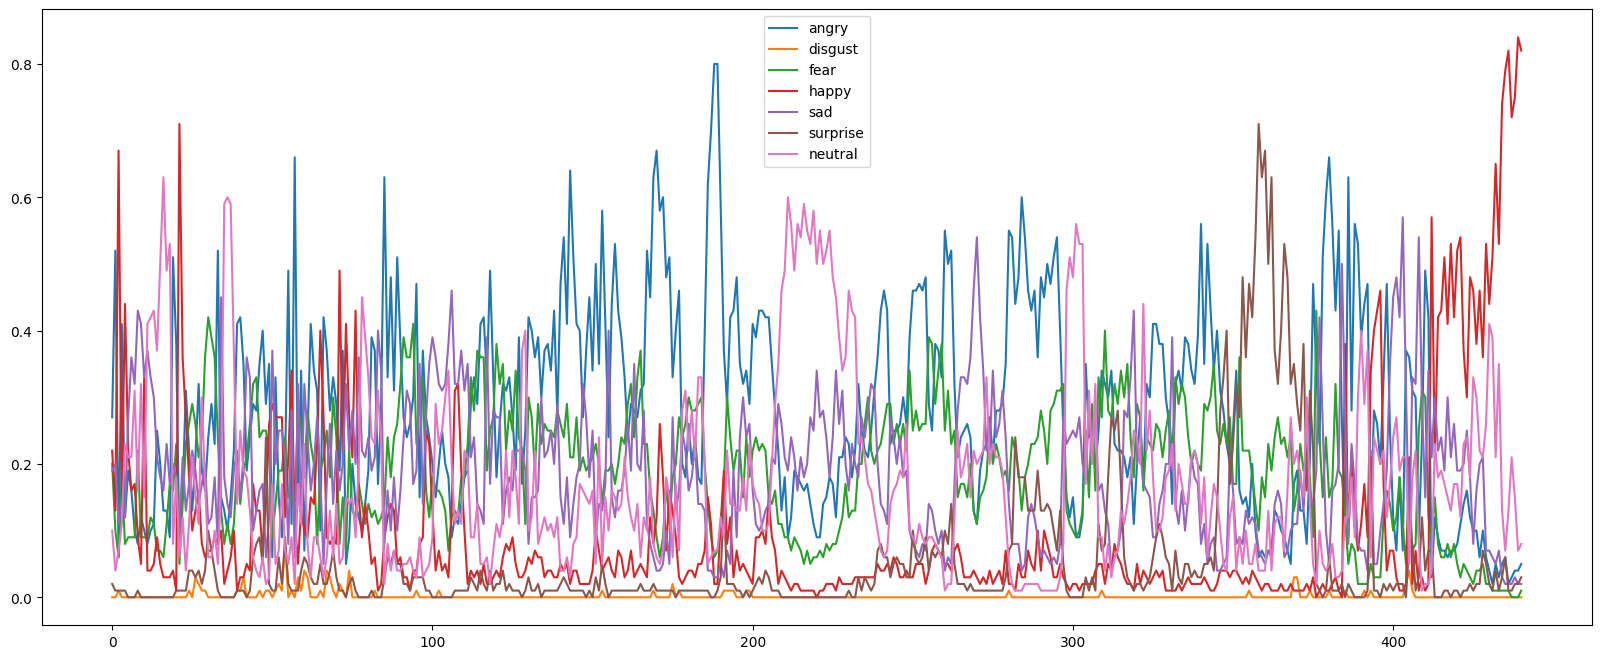

In [ ]:
# 시각화
pltfig = vid_df.plot(figsize=(20, 8))
plt.show()

In [ ]:
# 감정의 임계값 설정 (0.8 이상)
threshold = 0.8

# 감정 열 리스트
emotion_columns = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']

# 각 행별로 감정 점수를 확인하여 0.8 이상인 감정을 찾기
found_emotion = None
for index, row in vid_df.iterrows():
    for emotion in emotion_columns:
        if row[emotion] > threshold:
            found_emotion = emotion
            break
    if found_emotion is not None:
        break

# 결과 출력
if found_emotion is not None:
    print(f"첫 번째로 0.8 이상인 감정은 {found_emotion} 입니다.")
else:
    print("0.8 이상인 감정이 탐지되지 않았습니다.")


첫 번째로 0.8 이상인 감정은 happy 입니다.


In [ ]:
found_emotion

'happy'

In [ ]:
"""아래 코드에서 emotionSongs는 이미 각각의 감정에 따른 노래 URL이 딕셔너리로 정의되어 있는 상태입니다.
 fetchEmotionResult 함수에서 감정 분석 결과에 따라 musicUrl을 해당 감정에 맞는 노래 URL로 설정합니다.
그리고 playSong 함수를 호출하여 음악을 재생합니다.
실제로는 각각의 감정에 맞는 노래 URL을 적절하게 구성하여 딕셔너리에 추가해야 합니다.
또한, 플러터 앱에서 음악을 재생하는 함수(playSong)는 실제로 구현되어야 합니다.
이 코드는 간단한 예시를 보여주기 위한 것으로, 실제 앱에서는 API 호출, 음악 재생 등에 필요한 로직을 적절히 추가하여 구현해야 합니다."""

In [ ]:
import 'package:flutter/material.dart';
import 'package:http/http.dart' as http;
import 'dart:convert';

void main() => runApp(MyApp());

class MyApp extends StatelessWidget {
  @override
  Widget build(BuildContext context) {
    return MaterialApp(
      home: MusicPlayerPage(),
    );
  }
}

class MusicPlayerPage extends StatefulWidget {
  @override
  _MusicPlayerPageState createState() => _MusicPlayerPageState();
}

class _MusicPlayerPageState extends State<MusicPlayerPage> {
  String apiUrl = 'http://your-api-url/emotion-analysis';

  // 이미 딕셔너리로 정의되어 있는 각각의 감정에 따른 노래 URL
  Map<String, String> emotionSongs = {
    'angry': '/content/drive/MyDrive/Songs/angry_song.mp3',
    'disgust': '/content/drive/MyDrive/Songs/disgust_song.mp3',
    'fear': '/content/drive/MyDrive/Songs/fear_song.mp3',
    'happy': '/content/drive/MyDrive/Songs/happy_song.mp3',
    'sad': '/content/drive/MyDrive/Songs/sad_song.mp3',
    'surprise': '/content/drive/MyDrive/Songs/surprise_song.mp3',
    'neutral': '/content/drive/MyDrive/Songs/neutral_song.mp3'
  };

  String musicUrl;

  @override
  void initState() {
    super.initState();
    fetchEmotionResult();
  }

  Future<void> fetchEmotionResult() async {
    try {
      final response = await http.post(Uri.parse(apiUrl));
      final data = json.decode(response.body);
      setState(() {
        // 감정 분석 결과에 따라 해당 감정에 맞는 노래 URL을 가져옵니다.
        musicUrl = emotionSongs[data['emotion']];

        // 음악을 재생합니다.
        playSong(musicUrl);
      });
    } catch (e) {
      print('Error while fetching emotion result: $e');
    }
  }

  // 음악을 재생하는 함수 (이미 구현되어 있다고 가정)
  void playSong(String songUrl) {
    // 노래를 재생하는 코드를 추가합니다.
    // 이미 구현된 음악 재생 함수를 호출하는 방식으로 가정합니다.
  }

  @override
  Widget build(BuildContext context) {
    return Scaffold(
      appBar: AppBar(title: Text('Music Player')),
      body: Center(
        child: Column(
          mainAxisAlignment: MainAxisAlignment.center,
          children: [
            ElevatedButton(
              onPressed: () {
                // 감정 분석 결과를 기다리지 않고 음악을 재생하도록 변경했습니다.
                // musicUrl이 null이 아닐 때만 음악을 재생합니다.
                if (musicUrl != null) {
                  playSong(musicUrl);
                }
              },
              child: Text('Play Music'),
            ),
          ],
        ),
      ),
    );
  }
}
